In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
data = pd.read_csv("NYCrime.csv")
data.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [3]:
data.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [4]:
data.columns = ['City','Population','ViolentCrime','MurderAndManslaughter','RapeRevised',
               'RapeLegacy','Robbery','AggravatedAssault','PropertyCrime','Burglary',
               'LarcenyTheft','MotorVehicleTheft','Arson']

In [5]:

#Replace "," with nothing
def convert_number(number):
    try:
        converted = int(number.replace(',', ''))
    except:
        converted = number
    
    return converted

data.fillna(0)
data['Population'] = data['Population'].apply(lambda x: convert_number(x))
data['ViolentCrime'] = data['ViolentCrime'].apply(lambda x: convert_number(x))
data['RapeLegacy'] = data['RapeLegacy'].apply(lambda x: convert_number(x))
data['Robbery'] = data['Robbery'].apply(lambda x: convert_number(x))
data['AggravatedAssault'] = data['AggravatedAssault'].apply(lambda x: convert_number(x))
data['PropertyCrime'] = data['PropertyCrime'].apply(lambda x: convert_number(x))
data['Burglary'] = data['Burglary'].apply(lambda x: convert_number(x))
data['LarcenyTheft'] = data['LarcenyTheft'].apply(lambda x: convert_number(x))
data['MotorVehicleTheft'] = data['MotorVehicleTheft'].apply(lambda x: convert_number(x))

In [6]:
data.dtypes

City                      object
Population                 int64
ViolentCrime               int64
MurderAndManslaughter      int64
RapeRevised              float64
RapeLegacy                 int64
Robbery                    int64
AggravatedAssault          int64
PropertyCrime              int64
Burglary                   int64
LarcenyTheft               int64
MotorVehicleTheft          int64
Arson                    float64
dtype: object

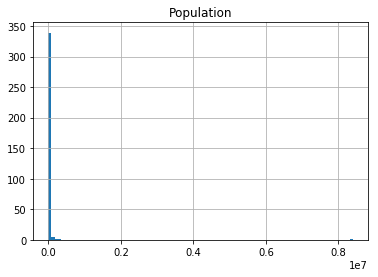

In [7]:
data['Population'].hist(bins=100)
plt.title('Population')
plt.show()

Looks like this is due to an outliner for New York City population. So let us remove this outliner and try to plot the graph again

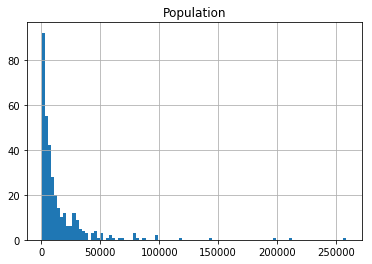

In [8]:
dataNYC = data[data.City != 'New York']
dataNYC['Population'].hist(bins=100)
plt.title('Population')
plt.show()

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


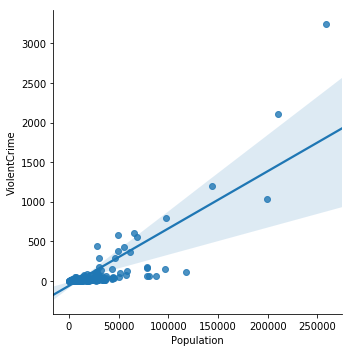

In [9]:
 sns.lmplot(x="Population",y="ViolentCrime",data=dataNYC)

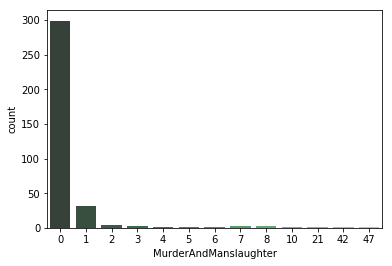

In [10]:
 sns.countplot(x="MurderAndManslaughter",data=dataNYC, palette="Greens_d")

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


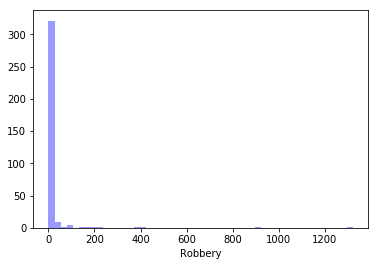

In [11]:
plot = sns.distplot(dataNYC.Robbery, kde=False, color="b")

In [12]:
featuresNYC = dataNYC[['City','Population']]

In [13]:
featuresNYC = featuresNYC.assign(Popsquared = featuresNYC.Population * 2)

In [14]:
featuresNYC = featuresNYC.assign(Murder = np.where(dataNYC.MurderAndManslaughter > 0,1,0 ))
featuresNYC = featuresNYC.assign(Robbery = np.where(dataNYC.Robbery > 0,1,0 ))

In [15]:
featuresNYC

,City,Population,Popsquared,Murder,Robbery
0,Adams Village,1861,3722,0,0
1,Addison Town and Village,2577,5154,0,0
2,Akron Village,2846,5692,0,0
3,Albany,97956,195912,1,1
4,Albion Village,6388,12776,0,1
5,Alfred Village,4089,8178,0,1
6,Allegany Village,1781,3562,0,0
7,Amherst Town,118296,236592,1,1
8,Amityville Village,9519,19038,0,1
9,Amsterdam,18182,36364,0,1
